## 1. Prétraitement des données

In [310]:
from keras.datasets import fashion_mnist
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

**1.2** \
Les données sont de type numpy.ndarray et ont pour forme (nombre d'images, nombre de pixel (h), nombre de pixel (l))

In [311]:
print(f"Type de X_train : {type(X_train)}, Forme : {X_train.shape}")
print(f"Type de y_train : {type(y_train)}, Forme : {y_train.shape}")
print(f"Type de X_test : {type(X_test)}, Forme : {X_test.shape}")
print(f"Type de y_test : {type(y_test)}, Forme : {y_test.shape}")
num_targets = len(np.unique(y_train))
print(f"Nombre de classes : {num_targets}")

Type de X_train : <class 'numpy.ndarray'>, Forme : (60000, 28, 28)
Type de y_train : <class 'numpy.ndarray'>, Forme : (60000,)
Type de X_test : <class 'numpy.ndarray'>, Forme : (10000, 28, 28)
Type de y_test : <class 'numpy.ndarray'>, Forme : (10000,)
Nombre de classes : 10


In [312]:
# Dictionnaire des noms des labels
label_names = ['T-shirt', 'Pantalon', 'Pull', 'Robe', 'Manteau',
               'Sandale', 'Chemise', 'Basket', 'Sac', 'Bottine']

# Répartition des targets dans le jeu d'entraînement
unique, counts = np.unique(y_train, return_counts=True)
train_distribution = dict(zip(unique, counts))
print("Répartition des targets dans y_train :")
for label, count in train_distribution.items():
    print(f"{label_names[label]}: {count}")

# Répartition des targets dans le jeu de test
unique, counts = np.unique(y_test, return_counts=True)
test_distribution = dict(zip(unique, counts))
print("\nRépartition des targets dans y_test :")
for label, count in test_distribution.items():
    print(f"{label_names[label]}: {count}")

Répartition des targets dans y_train :
T-shirt: 6000
Pantalon: 6000
Pull: 6000
Robe: 6000
Manteau: 6000
Sandale: 6000
Chemise: 6000
Basket: 6000
Sac: 6000
Bottine: 6000

Répartition des targets dans y_test :
T-shirt: 1000
Pantalon: 1000
Pull: 1000
Robe: 1000
Manteau: 1000
Sandale: 1000
Chemise: 1000
Basket: 1000
Sac: 1000
Bottine: 1000


**1.3** \
La **Répartition** est équilibrée car chaque "labels/catégorie" est représentée de manière égale dans les jeux de données d'entrainement et de test. (il y a 6000 images de chaque catégorie dans le jeu d'entraînement)
\
La répartition est donc **cohérente** pour les models d'apprentissage car chaque catégorie est représenté de façon égale.

**1.4**\
Les données doivent être soit reshape afin d'avoir une matrice, mais en faisant un reshape nous touchons directement au données. Or, nous pouvons aussi utiliser un flatten avant les couches d'activations qui ne modifira pas les données.\ \
Cette étape permet de transfomer les images en vecteurs pour la compatibilité avec les models dense.

**1.5** \
<!-- Il y a plusieurs façon de faire si la répartition est déséquilibré. Nous pouvons rééchantillonée le datasets,  -->

In [313]:
for i in range(9):
    print(f"Image {i+1} - Label: {label_names[y_train[i]]}")

Image 1 - Label: Bottine
Image 2 - Label: T-shirt
Image 3 - Label: T-shirt
Image 4 - Label: Robe
Image 5 - Label: T-shirt
Image 6 - Label: Pull
Image 7 - Label: Basket
Image 8 - Label: Pull
Image 9 - Label: Sandale


**1.8**\
Nous allons ici faire la normalisation des valeurs des pixels (de 0-255 à 0-1), et ensuite flatten les données afin que les images soit sous forme de vecteurs pour la compatibilité avec le model.

In [314]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# flatten = tf.keras.layers.Flatten(input_shape=(28, 28))

# X_train = flatten(X_train).numpy()
# X_test = flatten(X_test).numpy()

# print(f"Forme de X_train après transformation : {X_train.shape}")
# print(f"Forme de X_test après transformation : {X_test.shape}")


## 2. Création d'un premier modèle

**2.1**\
La fonction d'activation pour la couche de sortie dois être un softmax car nous avons une classification multiple à faire, avec un nombre de neurones égale au nombre de classe (10 pour nous) 


In [315]:
# Supposons que X_train et y_train_one_hot soient vos données d'entraînement
# et que y_train_one_hot soit encodé en one-hot
num_classes = 10  
num_neurons_un = 256
num_neurons = 128
dropout = 0.4

# Créer le modèle
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Aplatir les images 28x28 en vecteurs 1D
model.add(Dense(num_neurons_un, activation=tf.nn.relu))  # Première couche cachée avec 256 neurones et activation ReLU
model.add(tf.keras.layers.Dropout(dropout))
model.add(Dense(num_neurons, activation=tf.nn.relu)) 
model.add(tf.keras.layers.Dropout(dropout))
model.add(Dense(num_classes, activation='softmax'))  # Couche de sortie avec softmax

model.summary()


c:\Users\cleme\Documents\Code\M1DENG\S2\BigData\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_42 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_125 (Dense)               │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_126 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

**2.3**\
Pour calculer les poids il faut faire _le nbr de neurones * le nombre d'entrée + le nombre de biais_\
Il y a pour la première couche dense _784 * 256 + 256  = 200 960_.\
Pour la seconde couche nous avons _256 * 256 + 256 = 65 792_ poids.\
Et pour la dernière couche nous avons _256 * 10 + 10 = 2 570_ poids.

**2.4**\
Les meilleurs paramètre pour la fonction compile selon moi sont l'optimizer _adam_ cariIl adapte les taux d'apprentissage pour chaque paramètre individuellement, ce qui permet une convergence rapide et stable. Puis pour le paramètre de Loss nous allons utiliser _categorical crossentropy_ car cette fonction de perte est adaptée au problèmes de classification multiple. Et enfin pour les métriques nous allons utiliser _accuracy_ qui mesure le pourcentage de prédicitons correctes.

In [316]:
# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**2.5**\
Pour calculer le batch size sachant que nous avons 20% de validations, nous calculons 60 000 - 20% (soit 12 000) = 48 000 et ensuite nous faisons 48 000 / 200 = 240. Cela veut dire que nous aurons un batch size de 240.

In [317]:
y_train = to_categorical(y_train)

history = model.fit(X_train, y_train, epochs=20, batch_size=240, validation_split=0.2)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6183 - loss: 1.0894 - val_accuracy: 0.8348 - val_loss: 0.4569
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8201 - loss: 0.5132 - val_accuracy: 0.8501 - val_loss: 0.4162
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8411 - loss: 0.4525 - val_accuracy: 0.8623 - val_loss: 0.3789
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8487 - loss: 0.4162 - val_accuracy: 0.8581 - val_loss: 0.3780
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8555 - loss: 0.4011 - val_accuracy: 0.8717 - val_loss: 0.3563
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8619 - loss: 0.3836 - val_accuracy: 0.8761 - val_loss: 0.3443
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8679 - loss: 0.3656 - val_accuracy: 0.8786 - val_loss: 0.3364
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8724 - loss: 0.3570 - val_accuracy: 0.

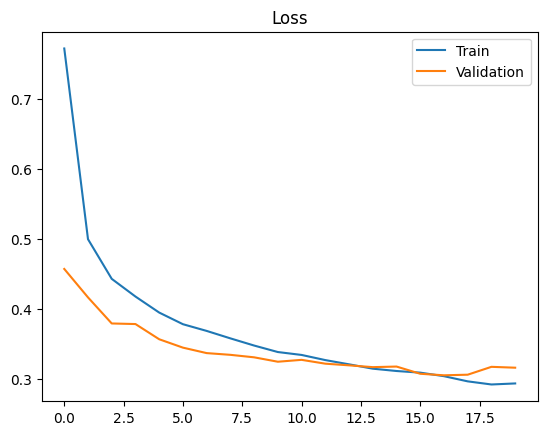

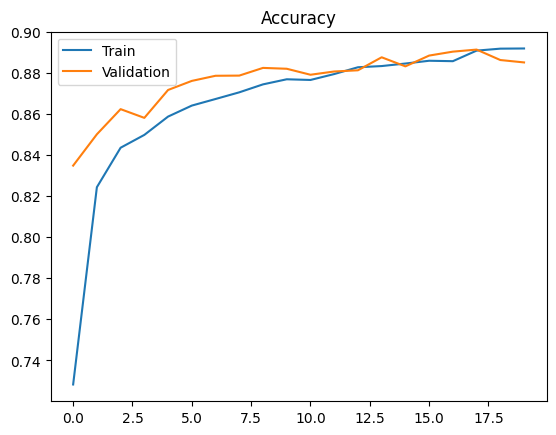

In [318]:
loss_curve = history.history['loss']
loss_val_curve = history.history['val_loss']
accuracy_curve = history.history['accuracy']
accuracy_val_curve = history.history['val_accuracy']
plt.plot(loss_curve, label='Train')
plt.plot(loss_val_curve, label='Validation')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()
plt.plot(accuracy_curve, label='Train')
plt.plot(accuracy_val_curve, label='Validation')
plt.legend(loc='upper left')
plt.title('Accuracy')
plt.show()

**2.7**\
Je ne pense pas que ça soit judicieux de faire plus de 20 epochs, on risquerait de faire du sur apprentissage. Nous constatons aussi que l'accuracy ici n'est pas très bonne.

## 3. Modification du modèle

**3.2**\
Je constate qu'il n'y a pas énormément de différence entre le model à 2 et celui à 3 couches. Je ne pense donc pas que ça soit judicieux de garder un model à trois couches.

**3.3**\
Les résultats ne me semble pas énormément dégradé, il semble à à peu près équivalent aux deux autres models.

**3.5**\
Nous pouvons conclure que lorsque nous ajoutons les dropouts le model à un meilleur apprentissage, nous passons à une _accuracy_ de presque 90%

**3.6**\
Le taux d'erreur semble augmenter lorsque la taille des batchs est divisée par deux, je pense que le modèle est alors en sur apprentissage.

**3.7**\
En effectuant la même chose mais cette fois avec la fonction d'activation _elu_ les résultats ne sont pas très bon, or, avec la fonction _sigmoïde_ les résultats sont à peu près équivalant au modèle M.

**3.8**\
En conclusion : \
Dans notre cas le model devient plus performant au 4ème modèle (model M). En divisant la taille des _batchs_ par 2 le modèle est alors en sur apprentissage. Nous pouvons aussi constater que lorsque nous ajoutons plus de couches ou de neurones ça n'améliore pas toujours un modèle. Et grâce à l'ajout de _dropout_ le modèle apprend mieux que lorsqu'il n'y en a pas.

Dans notre cas la taille des batchs influence l'apprentissage (sur apprentissage), et les différentes fonctions d'activation on un impact sur le modèle, nous constantons que la fonction _relu_ est plus adapté pour notre jeu de données que les fonctions _elu_ ou _sigmoïde_.


## 4. Analyse des résultats sur la partie test

In [319]:
y_test = to_categorical(y_test)
y_pred = model.predict(X_test)
y_pred_value = np.array(y_pred).argmax(axis=1)
y_test_val = np.array(y_test).argmax(axis=1)

df = pd.DataFrame(y_pred_value, columns=['y_pred'])
df['y_test'] = pd.DataFrame(y_test_val, columns=['y_test'])

total = 0
for i in range(10):
    val = df[(df['y_pred'] != i) & (df['y_test'] == i)].shape
    print(f'range {i} : {val[0]}')
    total += val[0]
print(total)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step
range 0 : 131
range 1 : 33
range 2 : 133
range 3 : 93
range 4 : 248
range 5 : 38
range 6 : 430
range 7 : 36
range 8 : 23
range 9 : 52
1217


**4.2**\
L'objet le plus mal identifié est la chemise.

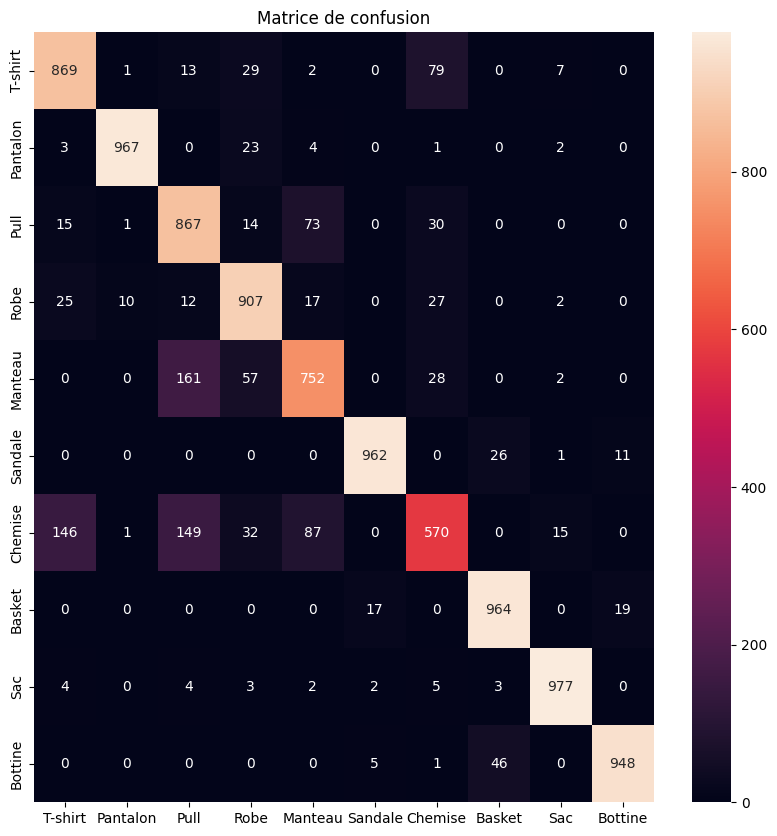

In [325]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test_val, y_pred_value), fmt='d', xticklabels=label_names, yticklabels=label_names, annot=True)
plt.title('Matrice de confusion')
plt.show()

**4.1**\
Les résultats du test sont cohérent avec par rapport à la partie validation obtenu lors du _fit_.

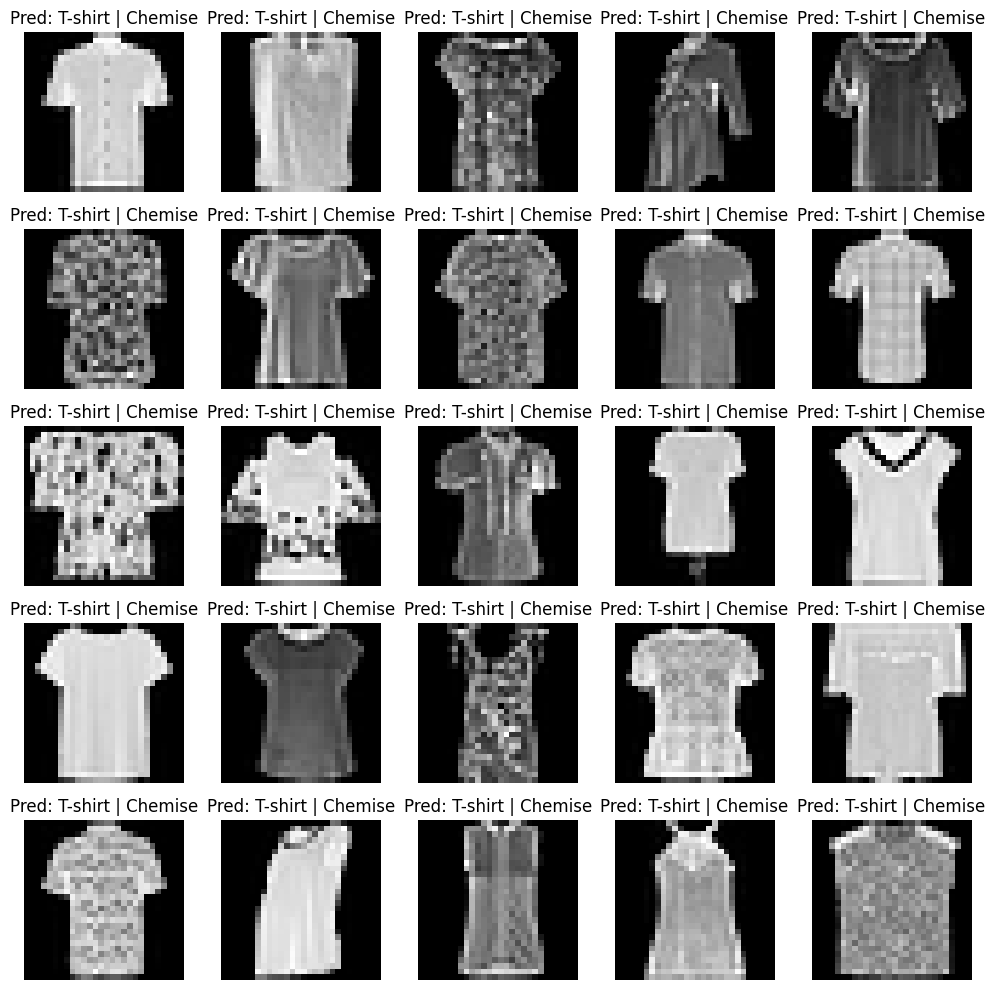

In [328]:
# Trouver les indices où y_pred est 'T_shirt' (0) et y_test est 'Chemise' (6)
ind = np.where((y_pred_value == 0) & (y_test_val == 6))[0]

# Vérifiez si les indices ne sont pas vides
if len(ind) == 0:
    print("Aucune correspondance trouvée pour y_pred == T_shirt et y_test == Chemise")
else:
    # Afficher les 25 premières erreurs dans une grille de 5x5
    plt.figure(figsize=(10, 10))
    for j, i in enumerate(ind[:25]):
        plt.subplot(5, 5, j + 1)
        plt.axis('off')
        image = X_test[i].reshape(28, 28) * 256
        plt.imshow(image, cmap='gray')
        plt.title(f"Pred: {label_names[0]} | {label_names[6]}")
    plt.tight_layout()
    plt.show()

**4.5**\
Avec le model que nous utilisons je ne penses pas qu'en gardant la taille des images les résultats pourrait être meilleurs.

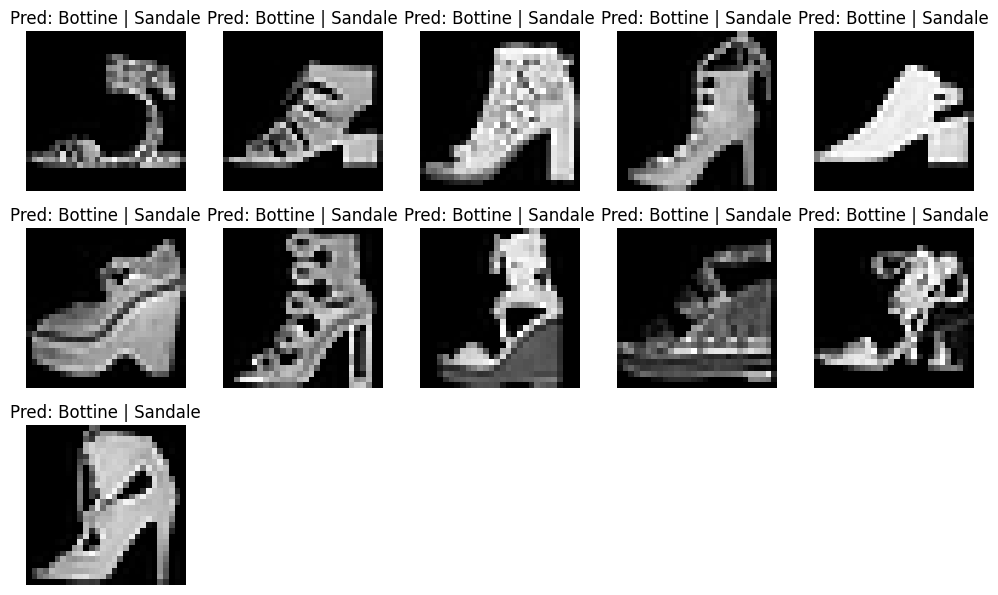

In [329]:
# Trouver les indices où y_pred est 'T_shirt' (0) et y_test est 'Chemise' (6)
ind = np.where((y_pred_value == 9) & (y_test_val == 5))[0]

# Vérifiez si les indices ne sont pas vides
if len(ind) == 0:
    print("Aucune correspondance trouvée pour y_pred == T_shirt et y_test == Chemise")
else:
    # Afficher les 25 premières erreurs dans une grille de 5x5
    plt.figure(figsize=(10, 10))
    for j, i in enumerate(ind[:25]):
        plt.subplot(5, 5, j + 1)
        plt.axis('off')
        image = X_test[i].reshape(28, 28) * 256
        plt.imshow(image, cmap='gray')
        plt.title(f"Pred: {label_names[9]} | {label_names[5]}")
    plt.tight_layout()
    plt.show()

**4.6**\
Avec le model que nous utilisons je ne penses pas qu'en gardant la taille des images les résultats pourrait être meilleurs.